In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import fkplotlib

fkplotlib.use_txfonts()

In [2]:
file_1scan = "Data/scans_act/20180119s282/results.fits"
file_4scan = "Data/scans_act/MAPS_out_v1.fits"
nhits_1scan = fits.getdata(file_1scan, 6)
nhits_4scan = fits.getdata(file_4scan, 6)
stdev_1scan = fits.getdata(file_1scan, 5)
stdev_4scan = fits.getdata(file_4scan, 5)
wcs_1scan = WCS(fits.getheader(file_1scan, 6))
wcs_4scan = WCS(fits.getheader(file_4scan, 6))

nhits_1scan[nhits_1scan == 0.0] = np.nan
nhits_4scan[nhits_4scan == 0.0] = np.nan
stdev_1scan[stdev_1scan == 0.0] = np.nan
stdev_4scan[stdev_4scan == 0.0] = np.nan

<IPython.core.display.Javascript object>


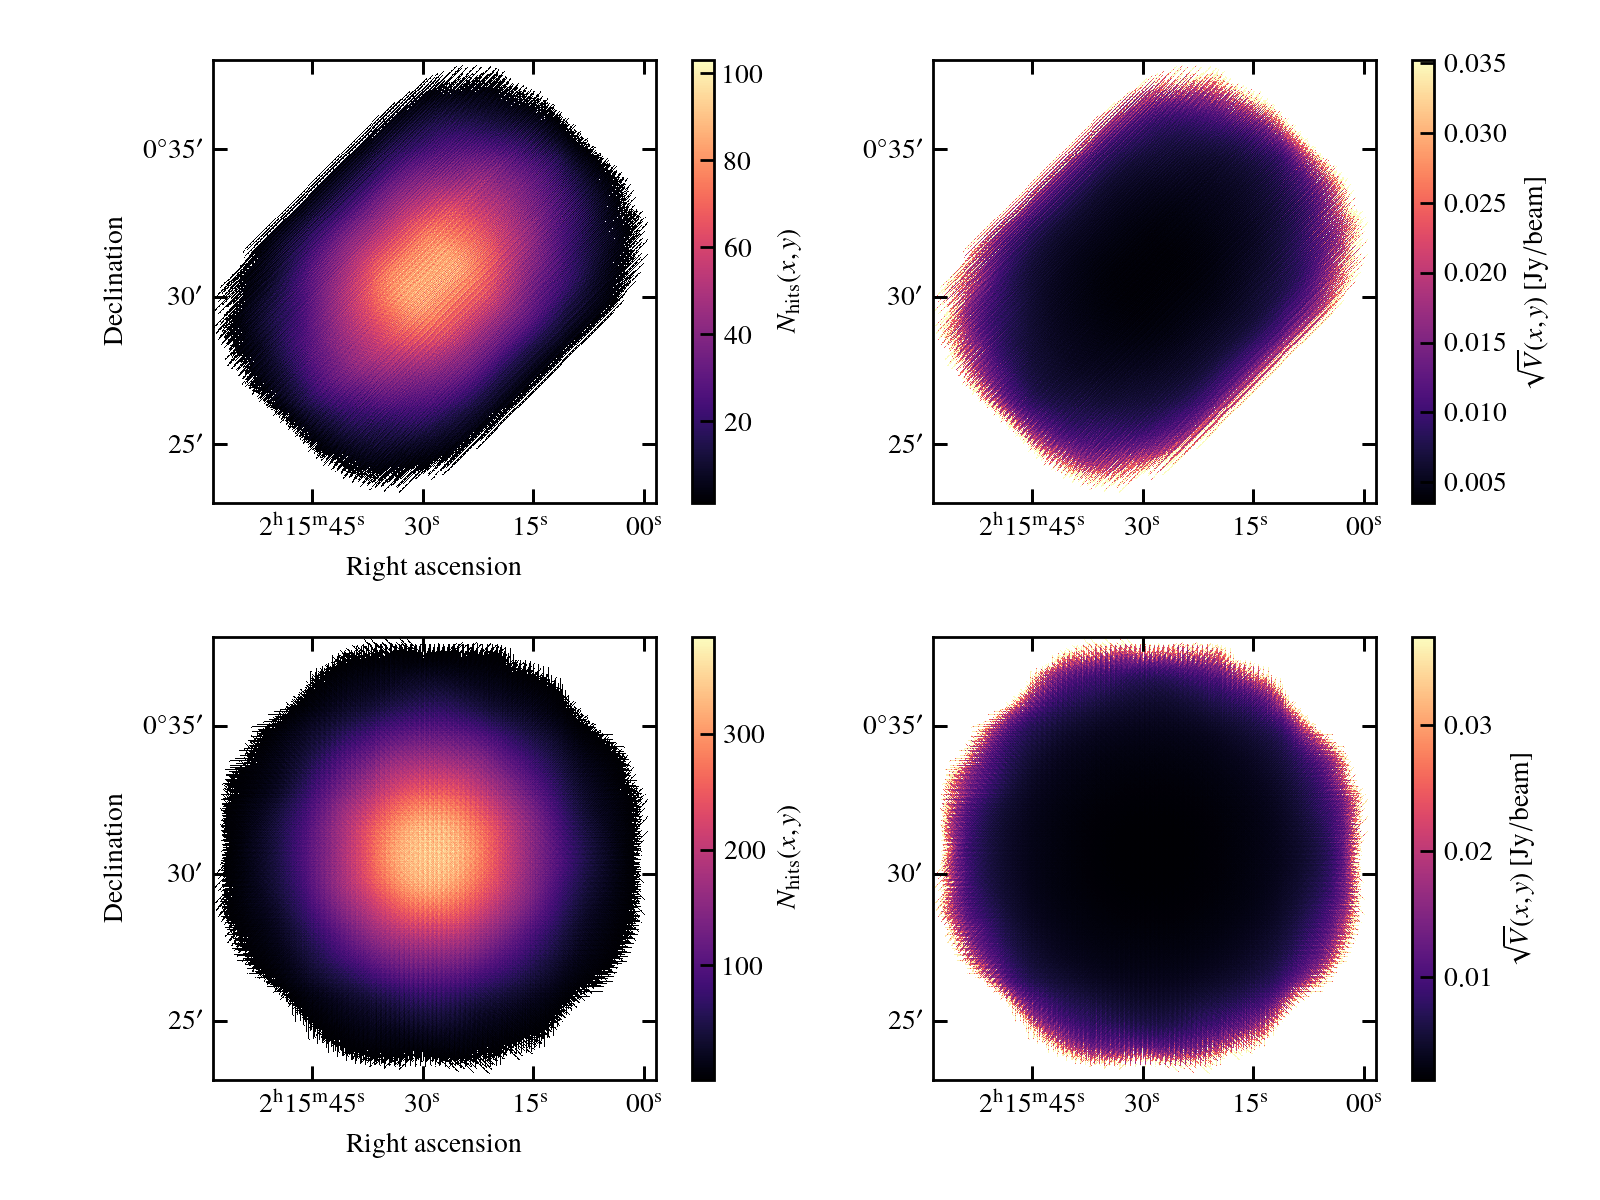

In [3]:
plt.close('all')
cmap = "magma"
fig = plt.figure(figsize=(8, 6))
axs = []

ax = fig.add_subplot(221, projection=wcs_1scan)
axs.append(ax)
im = ax.imshow(nhits_1scan, origin="lower", interpolation="none", cmap=cmap)
cb = fig.colorbar(im, ax=ax)
cb.set_label(r"$N_{\rm hits}(x, y)$")
ax.set_xlabel("Right ascension")
ax.set_ylabel("Declination")

ax = fig.add_subplot(222, projection=wcs_1scan)
axs.append(ax)
im = ax.imshow(stdev_1scan, origin="lower", interpolation="none", cmap=cmap)
cb = fig.colorbar(im, ax=ax)
cb.set_label(r"$\sqrt{V}(x, y) \; [{\rm Jy/beam}]$")
ax.set_xlabel(" ")
ax.set_ylabel(" ")

ax = fig.add_subplot(223, projection=wcs_1scan)
axs.append(ax)
im = ax.imshow(nhits_4scan, origin="lower", interpolation="none", cmap=cmap)
cb = fig.colorbar(im, ax=ax)
cb.set_label(r"$N_{\rm hits}(x, y)$")
ax.set_xlabel("Right ascension")
ax.set_ylabel("Declination")

ax = fig.add_subplot(224, projection=wcs_1scan)
axs.append(ax)
im = ax.imshow(stdev_4scan, origin="lower", interpolation="none", cmap=cmap)
cb = fig.colorbar(im, ax=ax)
cb.set_label(r"$\sqrt{V}(x, y) \; [{\rm Jy/beam}]$")
ax.set_xlabel(" ")
ax.set_ylabel(" ")

fig.subplots_adjust(hspace=0.3, wspace=0.0, left=0.05, right=0.95, bottom=0.1, top=0.95)
fig.align_labels(axs)

In [4]:
fig.savefig("scans.pdf")